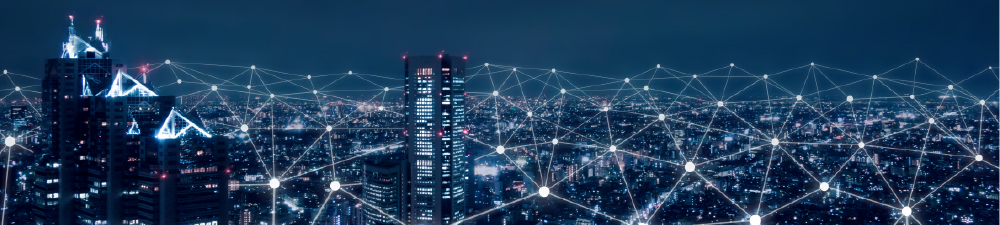

# Mini Project 2 - IU 4.5 Statistical Analysis

## Packages and setup

In [11]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [12]:
#Read data using pandas
user_df=pd.read_csv('Mini_project_2_Data.xls')

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [13]:
#Check for any missing values in the data using isnull() function

#False if there are no Null Values
user_df.isnull().any()

print('There are no missing values.')

userid            False
version           False
sum_gamerounds    False
retention_1       False
retention_7       False
dtype: bool

There are no missing values.


### Q1.2 Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

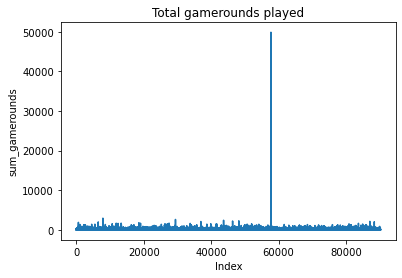

In [14]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [15]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier

maxvalue = user_df['sum_gamerounds'].max()
user_df[user_df['sum_gamerounds'] == maxvalue]

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


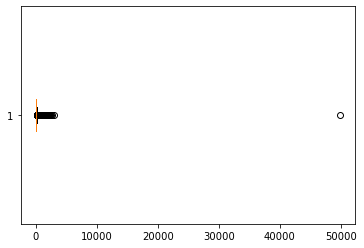

In [16]:
# # To double check outliers and prove that there are outliers

plt.clf()
plt.boxplot(user_df.sum_gamerounds,vert=False)
plt.show();

Max Value in "sum_gamerounds" that was removed --> 49854


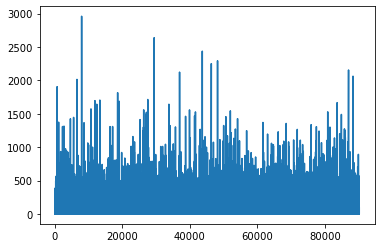

In [17]:
#Plot the graph for sum_gamerounds player after removing the outlier

user_df.drop(user_df[user_df['sum_gamerounds'] == maxvalue].index, inplace=True)


print(f'Max Value in "sum_gamerounds" that was removed -->', maxvalue)
plt.plot(user_df.sum_gamerounds);

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [18]:
# Shows the sum of retention_7 for True and False
user_df.retention_7.value_counts()

False    73408
True     16780
Name: retention_7, dtype: int64

In [19]:
#Insert calculation for 7-day retention rate

# using groupby().count()
retention_7_df = user_df.groupby('retention_7').count()

false_7 = retention_7_df.iloc[0][0]
true_7 = retention_7_df.iloc[1][0]

retention_rate_7 = ((true_7 / (false_7+true_7))*100).round(3)
print("Overall 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")

Overall 7 days retention rate of the game for both versions is:  18.606 %


In [20]:
#Insert calculation for 7-day retention rate

# using .value_counts()
cal_retention = user_df.retention_7.value_counts()

false_7 = cal_retention.iloc[0]
true_7 = cal_retention.iloc[1]

retention_rate_7 = ((true_7 / (false_7+true_7))*100).round(3)
print("Overall 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")

Overall 7 days retention rate of the game for both versions is:  18.606 %


### Q2.2 How many players never played the game after installing? 

In [21]:
# Find number of customers with sum_gamerounds is equal to zero
# Method 1 with Groupby

nvr_played = user_df.groupby('sum_gamerounds').size()[0]
print(f'There are', nvr_played, 'players who never played the game after installing')

There are 3994 players who never played the game after installing


In [22]:
# Find number of customers with sum_gamerounds is equal to zero
# Method 2 with counts

nvr_played = user_df[user_df['sum_gamerounds']==0]['userid'].count()
print(f'There are', nvr_played, 'players who never played the game after installing')

There are 3994 players who never played the game after installing


### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

YES: As the level increases, the number of users decreases.


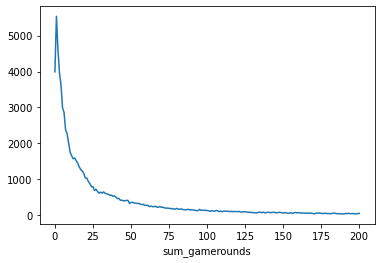

In [23]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart

user_df.groupby("sum_gamerounds").count()['userid'][:201].plot()
print("YES: As the level increases, the number of users decreases.");

<mark>__Analsysis Results:__
    
Type your interpretation here from the first 200 gamerounds chart generated above   
    
    The chart shows that the number of of users decrease as the level increases in the game which could highlight the      
    difficulty of the game.

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [24]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories
pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analsysis Results:__
    
Type your interpretation here from the crosstab generated above   
    
    Game version does affect the retention_rate_7 by 1% 
    Version Gate_30 (0.19) has higher 7-day retention rate compared to Gate_40 (0.18).

### Q3.2 Gamerounds summary for different game versions

In [25]:
#use pandas group by to calculate average game rounds played summarized by different versions
user_df.groupby('version').mean('sum_gamerounds').round(3)

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4987532.335,51.342,0.448,0.190
gate_40,5009072.580,51.299,0.442,0.182


In [26]:
# Method 2 to show all calucations of ('Verison')

user_df.groupby('version').sum_gamerounds.describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
gate_30,44699.0,51.342111,102.057598,0.0,5.0,17.0,50.0,2961.0
gate_40,45489.0,51.298776,103.294416,0.0,5.0,16.0,52.0,2640.0


<mark>__Analsysis Results:__
    
Do total number of gamerounds played in total by each player differ based on  different versions of the game? 
    
    Based on the above test, The results showed that there is a minor difference in the number of gamerounds played for either versions of the game based on the average number of 51 gamerounds played by each player.


## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [27]:
#Define A/B groups for hypothesis testing
user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")

# Seperate A and B into two different Groups
group_A=pd.DataFrame(user_df[user_df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df[user_df.version=="B"]['sum_gamerounds'])

user_df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,False,False
1,337,A,38,True,False
2,377,B,165,True,False
3,483,B,1,False,False
4,488,B,179,True,True


### Q4.1 Shapiro test of Normality

In [28]:
# Testing Shapiro-wilk test
shapA = shapiro(group_A)
shapB = shapiro(group_B)

shapA

ShapiroResult(statistic=0.48864424228668213, pvalue=0.0)

In [29]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal = more than 0.05
# ALTERNATE Hypothesis H1: Distribution is not normal = less than 0.05


#test for group_A
print("\n----------Test for group_A----------\n")
if shapiro(group_A)[1] > 0.05:
    print(f"We accept NULL Hypothesis H0: Distribution is normal")
else:
    print(f'We reject the NULL and accept the ALTERNATE Hypothesis H1: Distribution is not normal')

print(f"\nw-statistic:\t", shapA[0])
print(f"p-value:\t", shapA[1])



#test for group_B
print("\n----------Test for group_B----------\n")
if shapiro(group_B)[1] > 0.05:
    print(f"We accept NULL Hypothesis H0: Distribution is normal")
else:
    print(f'We reject the NULL and accept the ALTERNATE Hypothesis H1: Distribution is not normal')

print(f"\nw-statistic:\t", shapB[0])
print(f"p-value:\t", shapB[1])


----------Test for group_A----------

We reject the NULL and accept the ALTERNATE Hypothesis H1: Distribution is not normal

w-statistic:	 0.48864424228668213
p-value:	 0.0

----------Test for group_B----------

We reject the NULL and accept the ALTERNATE Hypothesis H1: Distribution is not normal

w-statistic:	 0.4825654625892639
p-value:	 0.0


<mark>__Analsysis Results:__
    
__Type your answer here:__ Analyze and interpret the results of shapiro test of normality i.e. are the two groups normally distributed?
    
    Both Group_A and Group_B are Lesser than the 5% critical value.
    Both Distribution is NOT normal, We should use a Non-Parametric Test

### Q4.2 Test of homegienity of variance

In [30]:
# Convert to np.array first to prevent One dimentional error
group_Ary = np.array(group_A.sum_gamerounds)
group_Bry = np.array(group_B.sum_gamerounds)

# Caclulate Levene test
result2 = stats.levene(group_Ary, group_Bry, center = 'median')
result2

LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

In [31]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances = more than 0.05
# ALTERNATE Hypothesis H1: Two groups do not have equal variances = less then 0.05

#perform levene's test and accept or reject the null hypothesis based on the results

if result2[1] > 0.05:
    print(f"We accept NULL Hypothesis H0: Two groups have equal variances")
else:
    print(f'We reject the NULL and accept the ALTERNATE Hypothesis H1: Two groups do not have equal variances')
    
print(f"\nw-statistic:\t", result2[0])
print(f"p-value:\t", result2[1])

We accept NULL Hypothesis H0: Two groups have equal variances

w-statistic:	 0.07510153837481241
p-value:	 0.7840494387892463


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of Levene's test
    
    Based on the Pvalue (0.784 > 0.05), we fail to reject the Null hypothesis.
    The large p-value suggests that the groups have equal variances.

### Q4.3 Test of significance: Two sample test

In [32]:
# We should use mannwhitneyu instead because this is a non-parametric test

utest = stats.mannwhitneyu(group_A, group_B)
utest

MannwhitneyuResult(statistic=1009027049.5, pvalue=0.02544577639572688)

In [33]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal = more then 0.05 
# ALTERNATE Hypothesis H1: Two samples are different = less then 0.05

#Apply relevant two sample test to accept or reject the NULL hypothesis

if utest[1] > 0.05 :
    print(f"We accept NULL Hypothesis H0: Two samples are equal")
else:
    print(f'We reject the NULL and accept the ALTERNATE Hypothesis H1: Two samples are different')

print(f"\nu-statistic:\t", utest[0])
print(f"p-value:\t", utest[1])

We reject the NULL and accept the ALTERNATE Hypothesis H1: Two samples are different

u-statistic:	 1009027049.5
p-value:	 0.02544577639572688


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of two sample hyothesis testing
    
    Based on our shapiro test. The distribution is not normal therefore we need to use Non-Parametric testing.
    Mann Whitney U was used and we rejected Null hypothesis as groups are different.

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [34]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function

user_df.groupby('version').agg({'retention_1':['mean'],'retention_7':['mean'],'sum_gamerounds':['mean']})

,retention_1,retention_7,sum_gamerounds
,mean,mean,mean
version,,,
A,0.448198,0.190183,51.342111
B,0.442283,0.182000,51.298776


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation to the company regarding which level works best as the first gate  - Level 30 or Level 40
    
We recommend to retain the current version where first gate is encountered at level 30 as player retention and number of game rounds played is higher than when first gate is encountered at level 40.
    

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

In [35]:
#Hint: Plot density function

In [36]:
#Subset version 
version_A = user_df.query('version == "A"') #['retention_7'].value_counts(normalize=True)
version_B = user_df.query('version == "B"')

A1_tolist = version_A['retention_1'].values.tolist()
A7_tolist = version_A['retention_7'].values.tolist()
B1_tolist = version_B['retention_1'].values.tolist()
B7_tolist = version_B['retention_7'].values.tolist()

In [39]:
import numpy as np
import random

print('Original mean:')
user_df.groupby('version')['retention_1'].mean()
user_df.groupby('version')['retention_7'].mean()

print('Sample mean:')

#Store in a list
A_retention_1 = []
A_retention_7 = []
B_retention_1 = []
B_retention_7 = []

#Use random sampling
for i in range(1000):
    #a_r_1 stand for version a, retention_1
    a_r_1 = random.sample(A1_tolist, 100)
    a_r_1 = np.sum(a_r_1)/ len(a_r_1) #no need specifying the conditional statement, because it is boolean
    #when using sum/ np.sum, it will only sum total of the TRUE
    A_retention_1.append(a_r_1)
print('Bootstrap resampling mean for retention_1 rate of version A is', np.mean(A_retention_1))

for i in range (1000):
    a_r_7 = random.sample(A7_tolist, 100)
    a_r_7 = np.sum(a_r_7)/ len(a_r_7)
    A_retention_7.append(a_r_7)
print('Bootstrap resampling mean for retention_7 rate of version A is', np.mean(A_retention_7))


for i in range (1000):    
    b_r_1 = random.sample(B1_tolist, 100)
    b_r_1 = np.sum(b_r_1)/ len(b_r_1)
    B_retention_1.append(b_r_1)
print('Bootstrap resampling mean for retention_1 rate of version B is', np.mean(B_retention_1))

for i in range (1000):    
    b_r_7 = random.sample(B7_tolist, 100)
    b_r_7 = np.sum(b_r_7)/ len(b_r_7)
    B_retention_7.append(b_r_7)
print('Bootstrap resampling mean for retention_7 rate of version B is', np.mean(B_retention_7))

Original mean:


version
A    0.448198
B    0.442283
Name: retention_1, dtype: float64

version
A    0.190183
B    0.182000
Name: retention_7, dtype: float64

Sample mean:
Bootstrap resampling mean for retention_1 rate of version A is 0.45032000000000005
Bootstrap resampling mean for retention_7 rate of version A is 0.18836000000000003
Bootstrap resampling mean for retention_1 rate of version B is 0.44212
Bootstrap resampling mean for retention_7 rate of version B is 0.18389000000000003


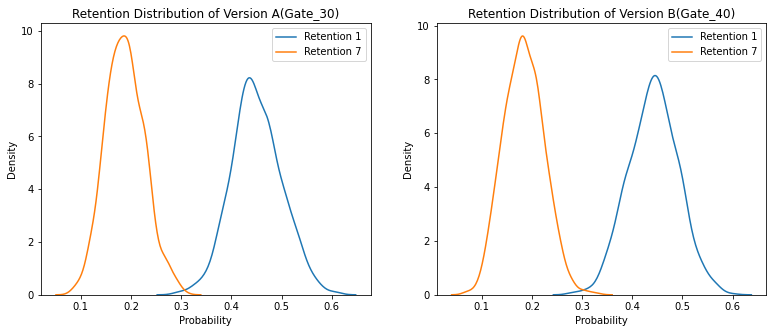

In [40]:
plt.figure(figsize = (13,5))
plt.subplots_adjust(hspace = 0.5)
plt.subplot(1,2,1)
sns.distplot(A_retention_1, label ='Retention 1', hist=False)
sns.distplot(A_retention_7, label ='Retention 7', hist=False)
plt.legend()
plt.title("Retention Distribution of Version A(Gate_30)")
plt.xlabel('Probability')

plt.subplot(1,2,2)
sns.distplot(B_retention_1, label ='Retention 1', hist=False)
sns.distplot(B_retention_7, label ='Retention 7', hist=False)
plt.legend()
plt.title("Retention Distribution of Version B(Gate_40)")
plt.xlabel('Probability')
plt.show();
#plt.savefig("AB_Retention_DensityPlot.png", dpi = 300); remove this comment when you want to export this displot.